This project takes a dataset of Hourly Energy Consumption from American Electric Power, one of the biggest US electricity providers, traded in the NASDAQ Stock Exchange and with more than 5 million clients.

It aims to extract useful insight on how electricity consumption is distributed accross time and how it has evolved accross the years. It also aims to predict the electricity consumption for the next year in the series.

In [ ]:
import os
from google.colab import drive

import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
drive.mount("/content/drive")
data_dir = "/content/drive/My Drive/Codigo/energy consumption"

df = pd.read_csv(f"{data_dir}/AEP_hourly.csv")

Mounted at /content/drive


# Get some info about the dataset

In [ ]:
# Display dataset characteristics
print(f'The dataset has {df.shape} rows and columns')
print(f'The columns are: {df.columns.tolist()}')
print(f'Some statistical values:\n{df.describe()}')
print(f'First rows of the dataset:\n{df.head()}')

The dataset has (121273, 2) rows and columns
The columns are: ['Datetime', 'AEP_MW']
Some statistical values:
              AEP_MW
count  121273.000000
mean    15499.513717
std      2591.399065
min      9581.000000
25%     13630.000000
50%     15310.000000
75%     17200.000000
max     25695.000000
First rows of the dataset:
              Datetime   AEP_MW
0  2004-12-31 01:00:00  13478.0
1  2004-12-31 02:00:00  12865.0
2  2004-12-31 03:00:00  12577.0
3  2004-12-31 04:00:00  12517.0
4  2004-12-31 05:00:00  12670.0


In [ ]:
# Are there any missing or incorrect values?
print(f'NULL values: \n {df.isnull().sum()}')
print(f'NA values: \n {df.isna().sum()}')
print(f'INF values: \n {np.isinf(df["AEP_MW"]).any()}')

NULL values: 
 Datetime    0
AEP_MW      0
dtype: int64
NA values: 
 Datetime    0
AEP_MW      0
dtype: int64
INF values: 
 False


In [ ]:
# How many years does the dataset cover?
print(df.iat[-1,0])
print(df.iat[0,0])

print("The dataset covers approximately 13 years")
print("We can also see that some years are incomplete. 2004 and 2018 only have one day")

2018-01-02 00:00:00
2004-12-31 01:00:00
The dataset covers approximately 13 years
We can also see that some years are incomplete. 2004 and 2018 only have one day


# Extract insights

In [ ]:
# Convert 'Datetime' to datetime objects
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Extract year from the 'Datetime' column
df['Year'] = df['Datetime'].dt.year

# Remove years 2004 and 2018
df = df[(df["Year"] != 2004) & (df["Year"] != 2018)]

## Consumption evolution accross years

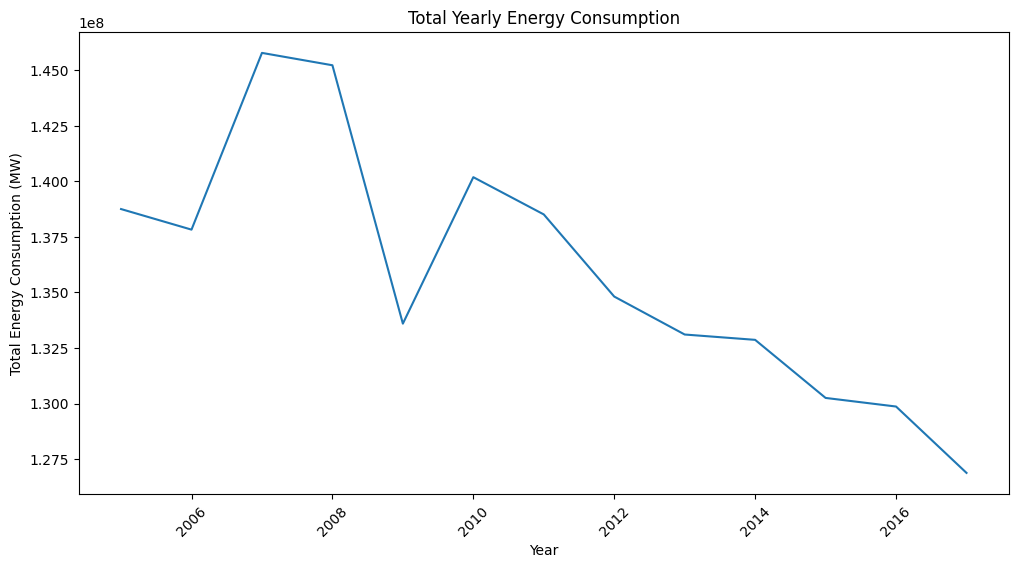

In [ ]:
# Group by year and calculate the total AEP_MW for each year
yearly_total_aep = df.groupby('Year')['AEP_MW'].sum()

# Create a plot using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_total_aep.index, y=yearly_total_aep.values)
plt.title('Total Yearly Energy Consumption')
plt.xlabel('Year')
plt.ylabel('Total Energy Consumption (MW)')
plt.xticks(rotation=45)
plt.show()

- Conclussions: There seems to be a fairly consistent decline accross the years, which could be attributed to a drop in the clients of the company. Because of this, it is more interesting to look for differences between months and days if we want to infer consumption patterns.

## Consumption variability between months

In [ ]:
df["Year"].unique().astype(int)

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017])

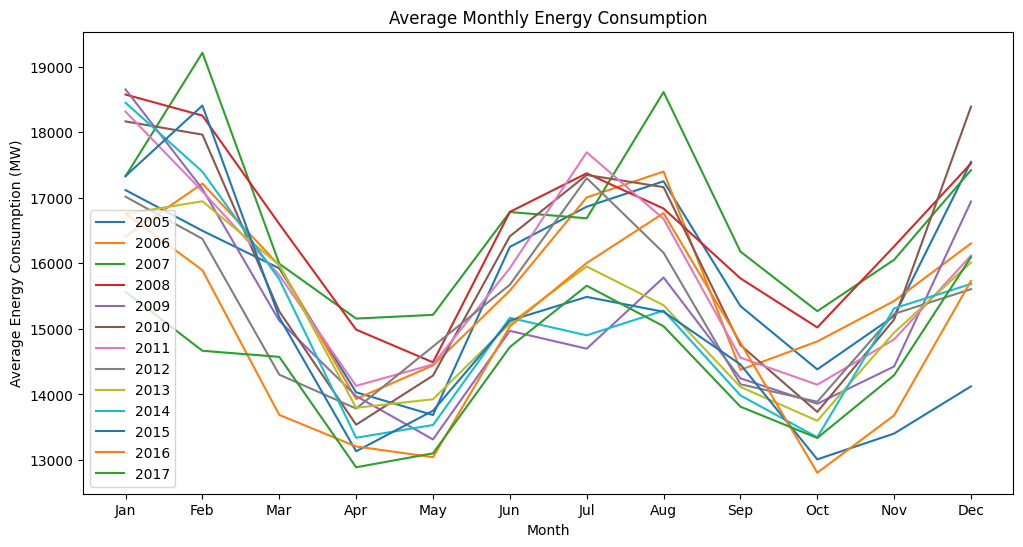

In [ ]:
# Plot the energy consumption by month

# Extract month from the 'Datetime' column
df['Month'] = df['Datetime'].dt.month

df_first_year = df[df['Year'] == 2005]
df_last_year = df[df['Year'] == 2017]

# Group by month and calculate the average AEP_MW for each month in the first and last years
monthly_avg_first_year = df_first_year.groupby('Month')['AEP_MW'].mean()
monthly_avg_last_year = df_last_year.groupby('Month')['AEP_MW'].mean()

# Create a plot using Seaborn
plt.figure(figsize=(12, 6))
df_years = df["Year"].unique().astype(int)
for i in df_years:
  monthly_avg = df[df["Year"] == i].groupby('Month')['AEP_MW'].mean()
  sns.lineplot(x=monthly_avg.index, y=monthly_avg.values, label=str(i))

plt.title('Average Monthly Energy Consumption')
plt.xlabel('Month')
plt.ylabel('Average Energy Consumption (MW)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xticks(range(1, 13))
plt.legend()
plt.show()

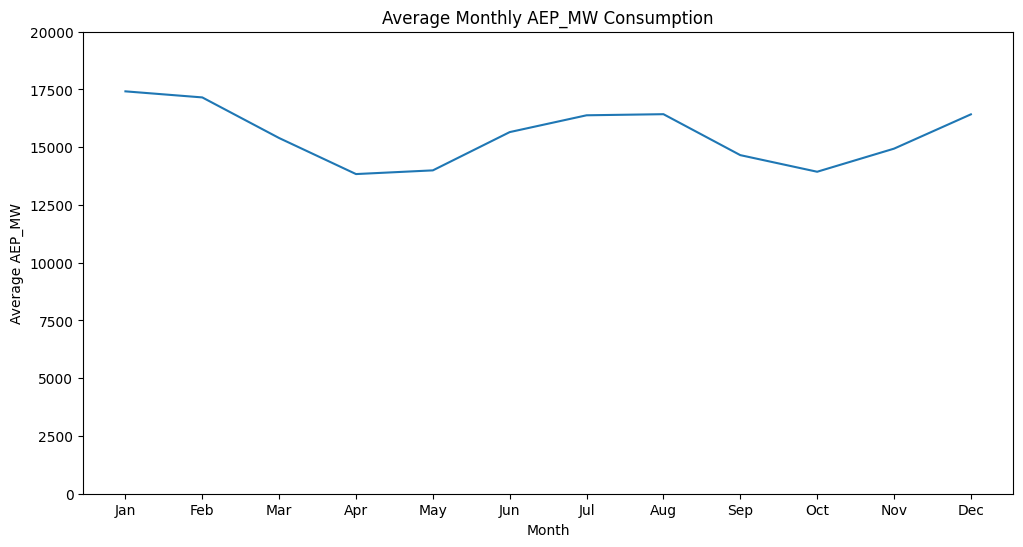

In [ ]:
# Group by month and calculate the average AEP_MW for each month
monthly_avg_aep = df.groupby('Month')['AEP_MW'].mean()

# Create a plot using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_avg_aep.index, y=monthly_avg_aep.values)
plt.title('Average Monthly AEP_MW Consumption')
plt.xlabel('Month')
plt.ylabel('Average AEP_MW')

# Set x-axis ticks and labels for each month
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylim(ymin=0)  # Set the y-axis minimum to 0
plt.ylim(ymax=20000)  # Set the y-axis minimum to 0

plt.show()


In [ ]:
# Calculate the average AEP_MW consumption per month
monthly_avg_aep = df.groupby('Month')['AEP_MW'].mean()

# Find the minimum average consumption
min_avg_consumption = monthly_avg_aep.min()

# Create a new DataFrame to store the results
result_df = pd.DataFrame({'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                         'Average Consumption': monthly_avg_aep.values})

# Calculate the percentage increase with respect to the minimum average consumption
result_df['Percentage Increase'] = "+" + (((result_df['Average Consumption'] - min_avg_consumption) / min_avg_consumption) * 100).round(2).astype(str) + '%'


# Round the average consumption to 2 decimal places
result_df['Average Consumption'] = result_df['Average Consumption'].round(2)

# Display the table
print("Average consumption per month between 2005 and 2017")
print(result_df)


Average consumption per month between 2005 and 2017
   Month  Average Consumption Percentage Increase
0    Jan             17418.68             +25.88%
1    Feb             17156.04             +23.98%
2    Mar             15397.16             +11.27%
3    Apr             13838.06               +0.0%
4    May             13997.89              +1.15%
5    Jun             15655.00             +13.13%
6    Jul             16382.41             +18.39%
7    Aug             16430.04             +18.73%
8    Sep             14657.28              +5.92%
9    Oct             13938.27              +0.72%
10   Nov             14938.10              +7.95%
11   Dec             16423.13             +18.68%


In [ ]:
# prompt: Using the previous data, I would like to display a table with the average consumption per month and the percentage increase with respect to the month with the lowest consumption. The values should have only 2 decimal numbers and the percentages should be in string format with % symbols. The months should be written, instead of numbers

# Calculate the average AEP_MW consumption per month
monthly_avg_aep = df[df["Year"] == 2017].groupby('Month')['AEP_MW'].mean()

# Find the minimum average consumption
min_avg_consumption = monthly_avg_aep.min()

# Create a new DataFrame to store the results
result_df = pd.DataFrame({'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                         'Average Consumption': monthly_avg_aep.values})

# Calculate the percentage increase with respect to the minimum average consumption
result_df['Percentage Increase'] = "+" + (((result_df['Average Consumption'] - min_avg_consumption) / min_avg_consumption) * 100).round(2).astype(str) + '%'


# Round the average consumption to 2 decimal places
result_df['Average Consumption'] = result_df['Average Consumption'].round(2)

# Display the table
print("Average consumption per month in 2017")
print(result_df)
print("\nIf we would check the temperatures for 2017 we could see if the increase"
"in December is due to cold weather. \nAnd maybe then project future consumption "
"based on weather predictions.")

Average consumption per month in 2017
   Month  Average Consumption Percentage Increase
0    Jan             15566.20             +20.78%
1    Feb             14665.68             +13.79%
2    Mar             14572.87             +13.07%
3    Apr             12888.33               +0.0%
4    May             13100.92              +1.65%
5    Jun             14722.43             +14.23%
6    Jul             15658.10             +21.49%
7    Aug             15040.50              +16.7%
8    Sep             13812.88              +7.17%
9    Oct             13335.42              +3.47%
10   Nov             14293.22              +10.9%
11   Dec             16094.73             +24.88%

If we would check the temperatures for 2017 we could see if the increasein December is due to cold weather. 
And maybe then project future consumption based on weather predictions.


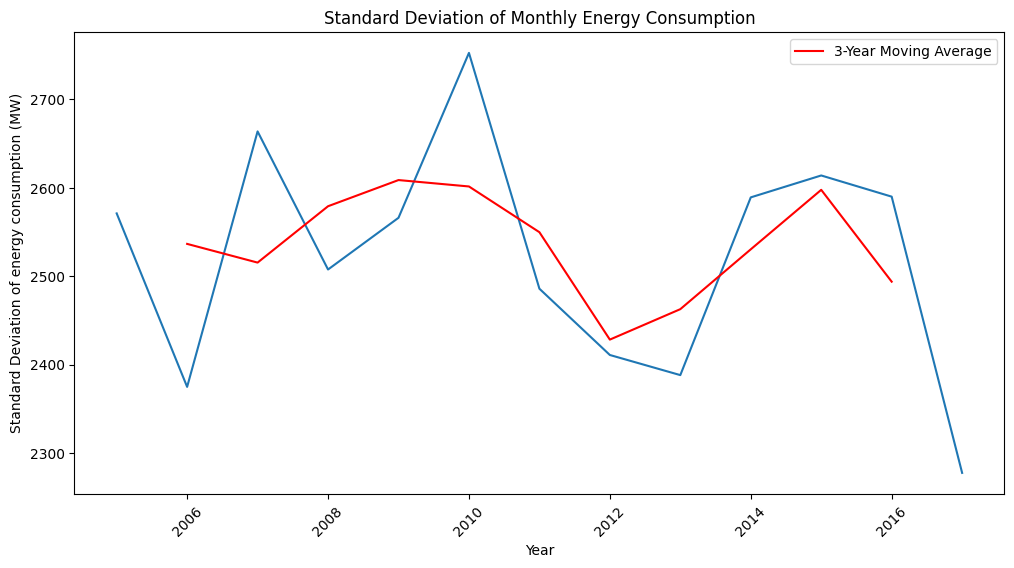

In [ ]:
# Group by year and calculate the standard deviation of Energy Consumption for each year
yearly_std_aep = df.groupby('Year')['AEP_MW'].std()

# Create a plot using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_std_aep.index, y=yearly_std_aep.values)

# Add the 3-year moving average
yearly_std_aep_rolling = yearly_std_aep.rolling(window=3, center=True).mean()
sns.lineplot(x=yearly_std_aep_rolling.index, y=yearly_std_aep_rolling.values, label='3-Year Moving Average', color='red')

plt.title('Standard Deviation of Monthly Energy Consumption')
plt.xlabel('Year')
plt.ylabel('Standard Deviation of energy consumption (MW)')
plt.xticks(rotation=45)
plt.show()

- Conclussions: It does not seem clear that the energy consumption variation by month has neither increased nor decreased during the studied timeframe.
